Data exploration of Costa Rican energy generation during October 2016.

Costa Rica is famous for producing almost of all of it's electricity needs via renewable methods. The aim of this analysis will be to show the energy production of the country on an hourly basis and a brakdown of how renewables contribute.

The data was obtained from https://www.kaggle.com/maulberto3/crc-electric-energy. 

In [2]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

df = pd.read_csv("SEN oct-2016.csv")

df.head()

,Planta (CENCE),Hora,Dia,Mes,Ano,Tipo de Empresa,Fuente,Tipo de Fuente,Produccion (MWh)
0,Aeroenergia,0,10/1/2016,10,2016,Privada,Eolica,Eolica,0.9639
1,Aeroenergia,1,10/1/2016,10,2016,Privada,Eolica,Eolica,0.0452
2,Aeroenergia,2,10/1/2016,10,2016,Privada,Eolica,Eolica,0.4453
3,Aeroenergia,3,10/1/2016,10,2016,Privada,Eolica,Eolica,1.0051
4,Aeroenergia,4,10/1/2016,10,2016,Privada,Eolica,Eolica,1.6287


The first 5 rows of the dataset shows the number and type of dimensions in the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60264 entries, 0 to 60263
Data columns (total 9 columns):
Planta (CENCE)      60264 non-null object
Hora                60264 non-null int64
Dia                 60264 non-null object
Mes                 60264 non-null int64
Ano                 60264 non-null int64
Tipo de Empresa     58776 non-null object
Fuente              58776 non-null object
Tipo de Fuente      59520 non-null object
Produccion (MWh)    60264 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 4.1+ MB


Further information on the dataset, including number of valid entries for each column.

ANALYSIS 1 - Plot hourly production across the October 2016

In [4]:
# concatenate the hour and date columns
Time = [df.Dia[i] + " " + str(df.Hora[i]) for i in range(len(df))]

# use the strptime method of datetime to allow python to understand the date and hour information
Times = []
for k in range(len(Time)):
    Times.append(datetime.datetime.strptime(Time[k], "%m/%d/%Y %H"))

#calculate the elapsed hours for each
elapsed_hours = np.array([hour - Times[0] for hour in Times]) / datetime.timedelta(hours = 1)

# add elapsed_hours to dataframe
df["Elapsed_Hours"] = pd.Series(elapsed_hours)

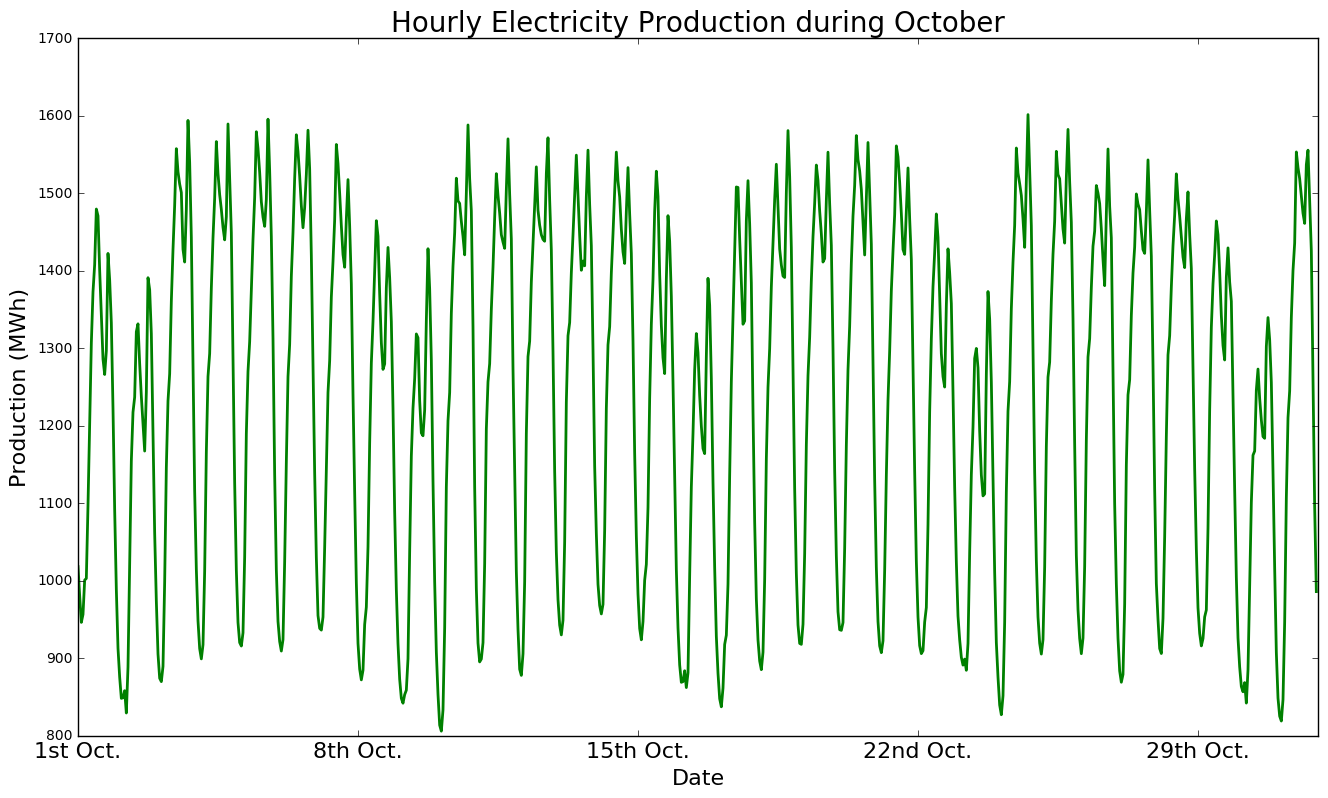

In [5]:
#use groupby function
hourly_production = df.groupby("Elapsed_Hours")["Produccion (MWh)"].sum()

#give the date of each hour to show on graph (more meaningful than elasped hours)


#plot results
x = np.unique(elapsed_hours)    
y = hourly_production
fig = plt.figure(figsize=(16,9), dpi=300)
plt.title("Hourly Electricity Production during October", fontsize=20)
ax = fig.add_subplot(111)
ax.plot(x, y, "-", color="green", linewidth=2)
ax.set_xlim(0,744)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Production (MWh)", fontsize=16)

#set x ticks to values that correspond to the start of the week
ax.set_xticks([0, 168, 336, 504, 672])
ax.set_xticklabels(["1st Oct.", "8th Oct.", "15th Oct.", "22nd Oct.", "29th Oct."], fontsize=16)

plt.show()

The above graph shows how electricity produced changed across the month in hourly increments

ANALYSIS 2 - Differentiate Hourly Production by Source

In [6]:
production_sources = df.groupby("Fuente")["Produccion (MWh)"].sum()
sources = list(pd.unique(df["Fuente"]))
bar_y = production_sources
log_bar_y = np.log10(production_sources)
x_axis = [0,1,2,3,4,5,6]

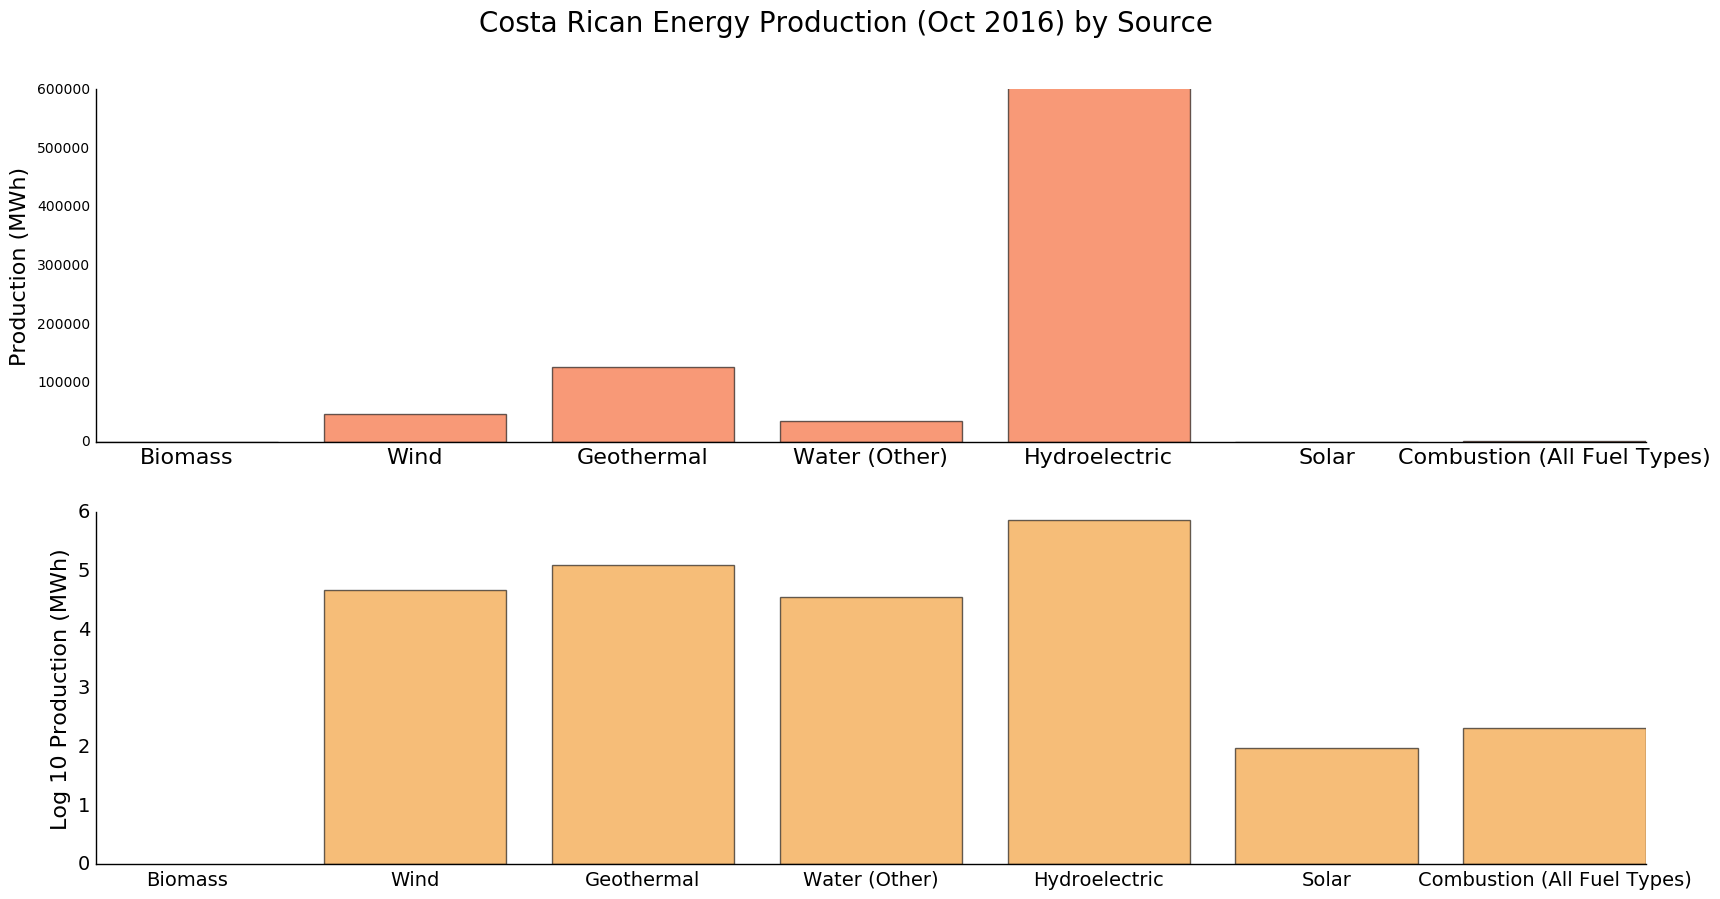

In [12]:
# set plot parameters and style
fig = plt.figure(figsize=(20,10))           #plot main figure
ax1 = fig.add_subplot(211)                   # define subplot
ax2 = fig.add_subplot(212,sharex=ax1)
ttl = "Costa Rican Energy Production (Oct 2016) by Source"
a = 0.6                                     # set transparency
c = "#01DF74"

#list of figures
axList = [ax1, ax2]
#set common figure parameters
for ax in axList:
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    ax.set_frame_on(True)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    #ax.set_xticklabels(["Biomass", "Wind", "Geothermal", "Water (Other)", "Hydroelectric", "Solar", "Combustion (All Fuel Types)"])
    #ax.set_xlim(,6.5)
#set individual axes limits
ax1.set_ylim(-200, 600000)

#define axes labels
ax1.set_ylabel("Production (MWh)")

#ax1
ax1.bar(x_axis, bar_y, align="center", color="#F4561D", alpha=a)
ax1.set_ylabel("Production (MWh)", fontsize=16)
ax1.set_xticks(x_axis)
ax1.set_xticklabels(["Biomass", "Wind", "Geothermal", "Water (Other)", "Hydroelectric", "Solar", "Combustion (All Fuel Types)"], fontsize=16)
#ax2
ax2.bar(x_axis, log_bar_y, align="center", color="#F1911E", alpha=a)
ax2.set_ylabel("Log 10 Production (MWh)", fontsize=16)
ax2.set_xticklabels(["Biomass", "Wind", "Geothermal", "Water (Other)", "Hydroelectric", "Solar", "Combustion (All Fuel Types)"], fontsize=16)
plt.suptitle("Costa Rican Energy Production (Oct 2016) by Source", fontsize=20)

#plt.savefig("Mega Watts of Production by Source.pdf")

#set fontsizes
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(14)
    
plt.show()

<p>Above: bar chart showing absolute energy production in MWh by source.<p>
<p>Below: bar chart showing energy production to log<sub>10<sub>.<p>

ANALYSIS 3 - Private vs Public Production

   How private and public generation differ in their sources.

In [14]:
#get indices that relate to Private and Public generation
priv_ind = []
pub_ind = []
for i in range(len(df)):
    if df.ix[i, "Tipo de Empresa"] == "Privada":
        priv_ind.append(i)
    elif df.ix[i, "Tipo de Empresa"] == "Publica":
        pub_ind.append(i)

private_sources = df.ix[priv_ind].groupby("Fuente")["Produccion (MWh)"].sum()
public_sources = df.ix[pub_ind].groupby("Fuente")["Produccion (MWh)"].sum()

In [16]:
#create new dataframe to house collated data above
    #ensure the number of "sources" (rows) are the same for publc and private
pp = pd.Series(pd.unique(df.Fuente)).to_frame()
pp = pp.dropna()
#set the index as the first column source values
pp.index = pp.ix[:,0]
#delete first column and add new public and private sources columns
del pp[0]
pp["Public"] = pd.Series(public_sources)
pp["Private"] = pd.Series(private_sources)

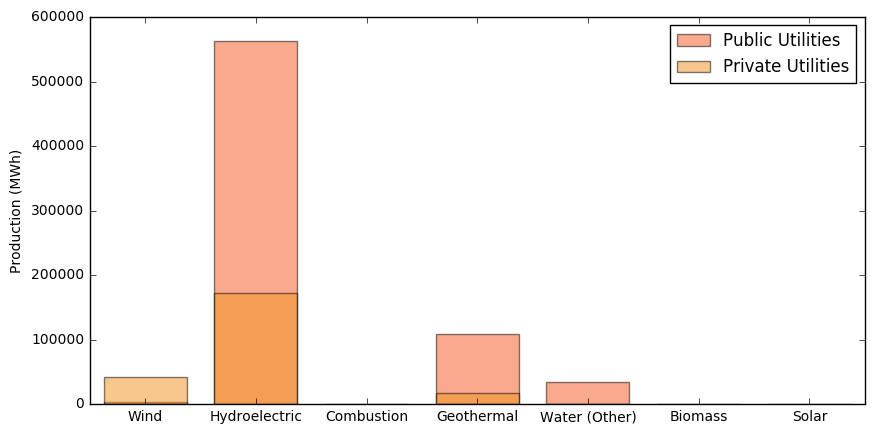

In [21]:
#create subplots and bars
bar_l = np.linspace(0,6,7, dtype=int)
fig, ax1 = plt.subplots(1, figsize=(10,5), dpi=300)
x_labels = x_labels = ["Wind", "Hydroelectric","Combustion", "Geothermal", "Water (Other)", "Biomass","Solar"]
bar_width = 0.75
public = pp['Public']
private = pp["Private"]
ax1.bar(bar_l,
        # using the public data
        public,
        # set the width
        width=bar_width,
        # with the label pre score
        label='Public Utilities',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F4561D',
        align="center")

ax1.bar(bar_l,
        # using the private data
        private,
        # set the width
        width=bar_width,
        # with pre_score on the bottom
        #bottom=public,
        # with the label mid score
        label='Private Utilities',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F1911E',
        align="center")

plt.ylim(0, 600000)
plt.xlim(-0.5,6.5)
ax1.set_ylabel("Production (MWh)")
ax1.set_xticks(bar_l)
ax1.set_xticklabels(x_labels)
plt.legend()

plt.show()

It is clear that Costa Rica makes the most of it's geography, with plentiful hydroelectric and geothermal reserves consituting the main sources of energy. Wind and various other water based eletricty generating methods providing most of the remaining energy requirements.

The contribution of solar and Combustion sources is masked by the scale. A smaller scale graph with those two sources is shown below. Biomass is also poorly displayed but it's contribution is negligible.

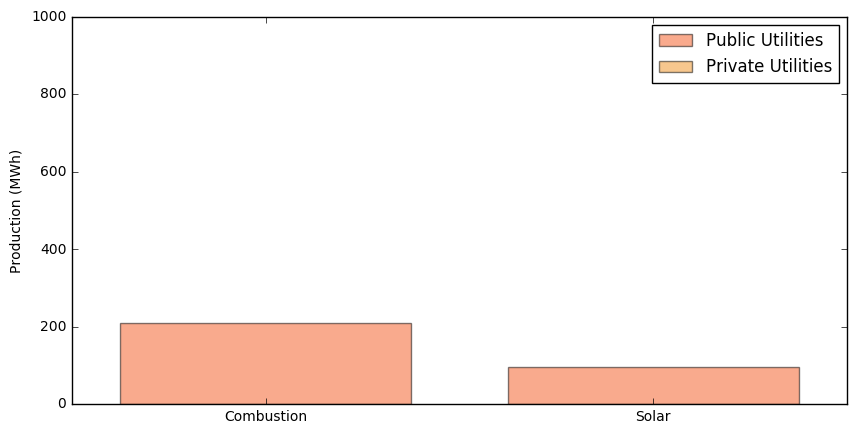

In [20]:
#smaller scale graph
#new data
small_public = [pp.ix["Termica","Public"], pp.ix["Solar","Public"]]
small_private = [pp.ix["Termica","Private"], pp.ix["Solar","Private"]]
small_bar_l = [0, 1]
fig, ax1 = plt.subplots(1, figsize=(10,5), dpi=300)
small_x_labels = x_labels = ["Combustion","Solar"]
bar_width = 0.75
ax1.bar(small_bar_l,
        # using the public data
        small_public,
        # set the width
        width=bar_width,
        # with the label pre score
        label='Public Utilities',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F4561D',
        align="center")

ax1.bar(small_bar_l,
        # using the private data
        small_private,
        # set the width
        width=bar_width,
        # with pre_score on the bottom
        #bottom=public,
        # with the label mid score
        label='Private Utilities',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F1911E',
        align="center")

plt.ylim(0, 1000)
plt.xlim(-0.5,1.5)
ax1.set_ylabel("Production (MWh)")
ax1.set_xticks(small_bar_l)
ax1.set_xticklabels(small_x_labels)
plt.legend()
plt.show()